<a href="https://colab.research.google.com/github/ashirm1999/CS6120-NLP/blob/main/Neural_Network_Ashir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pickle5

     |████████████████████████████████| 132 kB 9.5 MB/s eta 0:00:01
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-linux_x86_64.whl size=268691 sha256=c3fde4ccf57d623af3151825e5cf4da434d023b34f9f76456f3d8b9ae67dc597
  Stored in directory: /home/azureuser/.cache/pip/wheels/25/d4/61/dbd8edd1a0d656be7b4267c85db3b61951eb60016a0154a122
Successfully built pickle5


In [ ]:
import numpy as np
import pickle5 as pickle
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.utils.vis_utils import plot_model

In [ ]:
! unzip '/content/drive/MyDrive/CS6120 Data/data/pickle_files.zip'

Archive:  /content/drive/MyDrive/CS6120 Data/data/pickle_files.zip
  inflating: countvec.pickle         
  inflating: glovewordembeddings.pickle  
  inflating: tfidf.pickle            


# Simple Neural Network without Embeddings

## Multi-Layer Perceptron with Tf-idf Vectorizer

In [ ]:
with open("/content/tfidf.pickle", "rb") as fh:
  tf = pickle.load(fh)

In [ ]:
X_train, X_test, y_train, y_test = tf[0], tf[1], tf[2], tf[3]

In [ ]:
clf = MLPClassifier(hidden_layer_sizes = (500, 100, 10), verbose = True, max_iter = 10, early_stopping = True, solver = 'adam', activation = 'relu')

In [ ]:
clf.fit(X_train, y_train)

Iteration 1, loss = 0.60772262
Validation score: 0.699485
Iteration 2, loss = 0.47389820
Validation score: 0.723295
Iteration 3, loss = 0.29765881
Validation score: 0.735006
Iteration 4, loss = 0.18472710
Validation score: 0.731274
Iteration 5, loss = 0.13148661
Validation score: 0.731918
Iteration 6, loss = 0.10169295
Validation score: 0.730502
Iteration 7, loss = 0.08578524
Validation score: 0.730759
Iteration 8, loss = 0.07395814
Validation score: 0.728958
Iteration 9, loss = 0.06610491
Validation score: 0.731660
Iteration 10, loss = 0.06206929
Validation score: 0.729086


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(early_stopping=True, hidden_layer_sizes=(500, 100, 10),
              max_iter=10, verbose=True)

In [ ]:
print("Training Data Accuracy ", clf.score(X_train, y_train))
print("Testing Data Accuracy ", clf.score(X_test, y_test))

Training Data Accuracy  0.9125062743735279
Testing Data Accuracy  0.7296782496782497


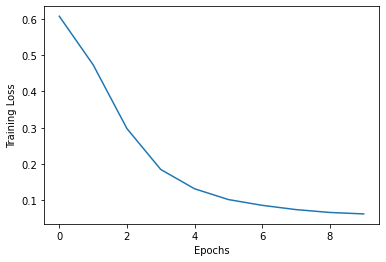

In [ ]:
plt.plot(clf.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

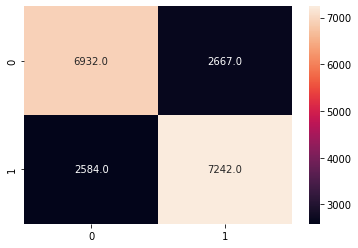

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = ".1f")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      9599
           1       0.73      0.74      0.73      9826

    accuracy                           0.73     19425
   macro avg       0.73      0.73      0.73     19425
weighted avg       0.73      0.73      0.73     19425



##Multi-Layer Perceptron with Count Vectorizer

In [ ]:
with open("/mnt/batch/tasks/shared/LS_root/mounts/clusters/ar-payer-analysis-am-is/code/Users/AshirBhavin.Mehta/Demo/countvec.pickle", "rb") as fh:
  cv = pickle.load(fh)

In [ ]:
X_train, X_test, y_train, y_test = cv[0], cv[1], cv[2], cv[3]

In [ ]:
clf = MLPClassifier(hidden_layer_sizes = (500, 100, 10), verbose = True, max_iter = 10, early_stopping = True, solver = 'adam', activation = 'relu')

In [ ]:
clf.fit(X_train, y_train)

Iteration 1, loss = 0.59710460
Validation score: 0.704247
Iteration 2, loss = 0.47728161
Validation score: 0.712870
Iteration 3, loss = 0.30766671
Validation score: 0.716216
Iteration 4, loss = 0.17744286
Validation score: 0.720463
Iteration 5, loss = 0.12074019
Validation score: 0.715573
Iteration 6, loss = 0.09362824
Validation score: 0.713900
Iteration 7, loss = 0.07697858
Validation score: 0.715315
Iteration 8, loss = 0.06697733
Validation score: 0.715573
Iteration 9, loss = 0.06117470
Validation score: 0.715444
Iteration 10, loss = 0.05825972


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(early_stopping=True, hidden_layer_sizes=(500, 100, 10),
              max_iter=10, verbose=True)

Validation score: 0.713900


In [ ]:
print("Training Data Accuracy ", clf.score(X_train, y_train))
print("Testing Data Accuracy ", clf.score(X_test, y_test))

Training Data Accuracy  0.9364454226031893
Testing Data Accuracy  0.7180437580437581


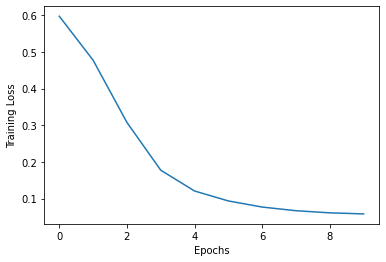

In [ ]:
plt.plot(clf.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

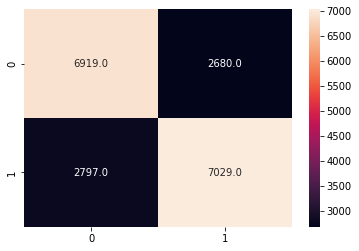

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = ".1f")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      9599
           1       0.72      0.72      0.72      9826

    accuracy                           0.72     19425
   macro avg       0.72      0.72      0.72     19425
weighted avg       0.72      0.72      0.72     19425



# Neural Network with Embeddings

In [ ]:
with open("/content/drive/MyDrive/glovewordembeddings.pickle", "rb") as fh:
  gw = pickle.load(fh)

In [ ]:
X_train_q1, X_train_q2, X_test_q1, X_test_q2, y_train, y_test, emd_matrix = gw[0], gw[1], gw[2], gw[3], gw[4], gw[5], gw[6]

In [ ]:
q1_inp = Input(shape = (50,))
q2_inp = Input(shape = (50,))
question1_embedded = Embedding(15056, 200, weights = [emd_matrix])(q1_inp)
question2_embedded = Embedding(15056, 200, weights = [emd_matrix])(q2_inp)

In [ ]:
x = Bidirectional(CuDNNGRU(64, return_sequences = True))(question1_embedded)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation = "relu")(x)
x = Dropout(0.35)(x)
x = Dense(1, activation = "sigmoid")(x)
x = Model(inputs = q1_inp, outputs = x)

y = Bidirectional(CuDNNGRU(64, return_sequences = True))(question2_embedded)
y = GlobalMaxPool1D()(y)
y = Dense(16, activation = "relu")(y)
y = Dropout(0.35)(y)
y = Dense(1, activation = "sigmoid")(y)
y = Model(inputs = q2_inp, outputs = y)

combined = layers.concatenate([x.output, y.output])
 
z = Dense(16, activation = "relu")(combined)
z = Dropout(0.35)(z)
z = Dense(1, activation = "sigmoid")(z)

model = Model(inputs = [q1_inp, q2_inp], outputs = z)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['AUC', 'Precision', 'Recall', 'accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 200)      3011200     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 50, 200)      3011200     ['input_2[0][0]']                
                                                                                            

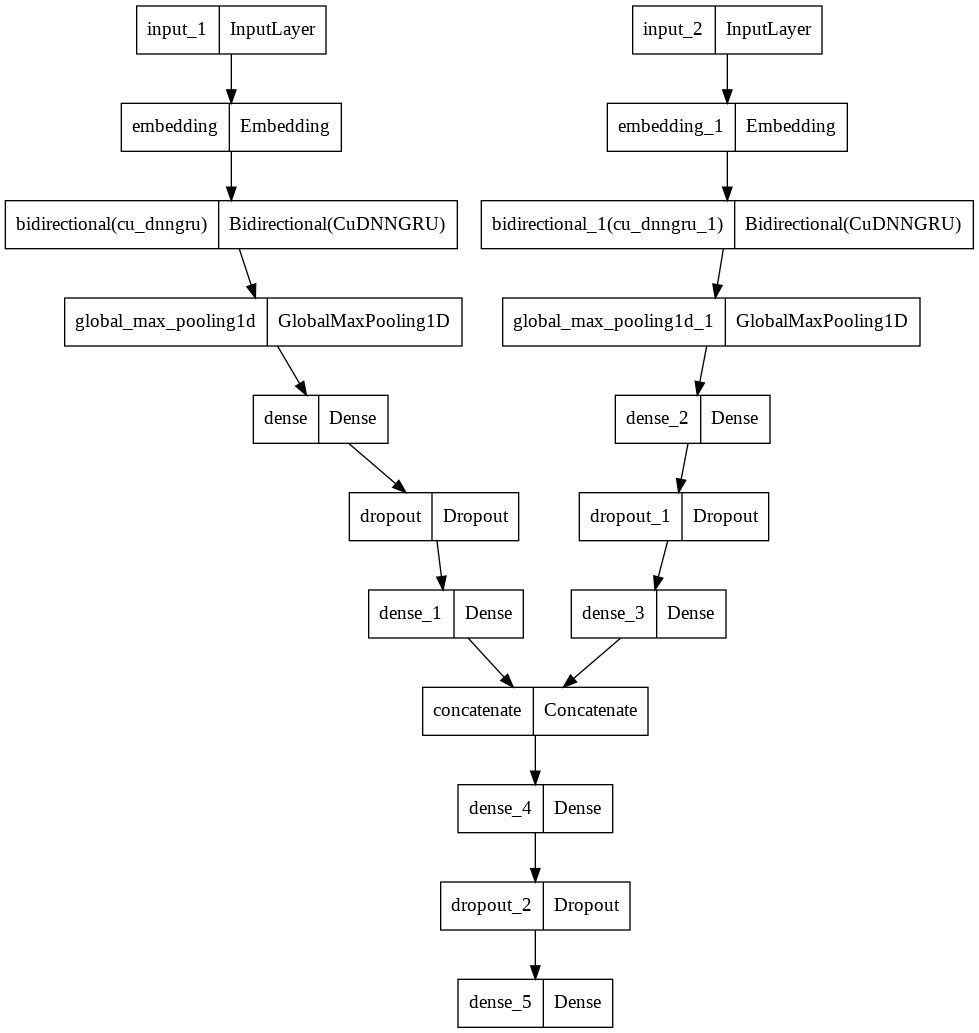

In [ ]:
plot_model(model, to_file = 'model.png')

In [ ]:
X_val_q1 = X_train_q1[50000:]
X_val_q2 = X_train_q2[50000:]
y_val = y_train[50000:]

In [ ]:
history = model.fit([X_train_q1, X_train_q2], y_train, batch_size = 1000, epochs = 10, validation_data = ([X_val_q1, X_val_q2], y_val))

Epoch 1/10
78/78 [==============================] - 7s 82ms/step - loss: 0.6907 - auc: 0.5427 - precision: 0.5411 - recall: 0.4743 - accuracy: 0.5335 - val_loss: 0.6739 - val_auc: 0.6733 - val_precision: 0.6369 - val_recall: 0.5866 - val_accuracy: 0.6228
Epoch 2/10
78/78 [==============================] - 4s 57ms/step - loss: 0.6594 - auc: 0.6640 - precision: 0.6210 - recall: 0.6799 - accuracy: 0.6304 - val_loss: 0.6257 - val_auc: 0.7392 - val_precision: 0.6557 - val_recall: 0.7756 - val_accuracy: 0.6814
Epoch 3/10
78/78 [==============================] - 4s 55ms/step - loss: 0.6190 - auc: 0.7222 - precision: 0.6671 - recall: 0.7202 - accuracy: 0.6787 - val_loss: 0.5786 - val_auc: 0.7850 - val_precision: 0.7276 - val_recall: 0.7178 - val_accuracy: 0.7221
Epoch 4/10
78/78 [==============================] - 4s 56ms/step - loss: 0.5822 - auc: 0.7658 - precision: 0.7036 - recall: 0.7442 - accuracy: 0.7138 - val_loss: 0.5345 - val_auc: 0.8198 - val_precision: 0.7331 - val_recall: 0.7994 - v

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

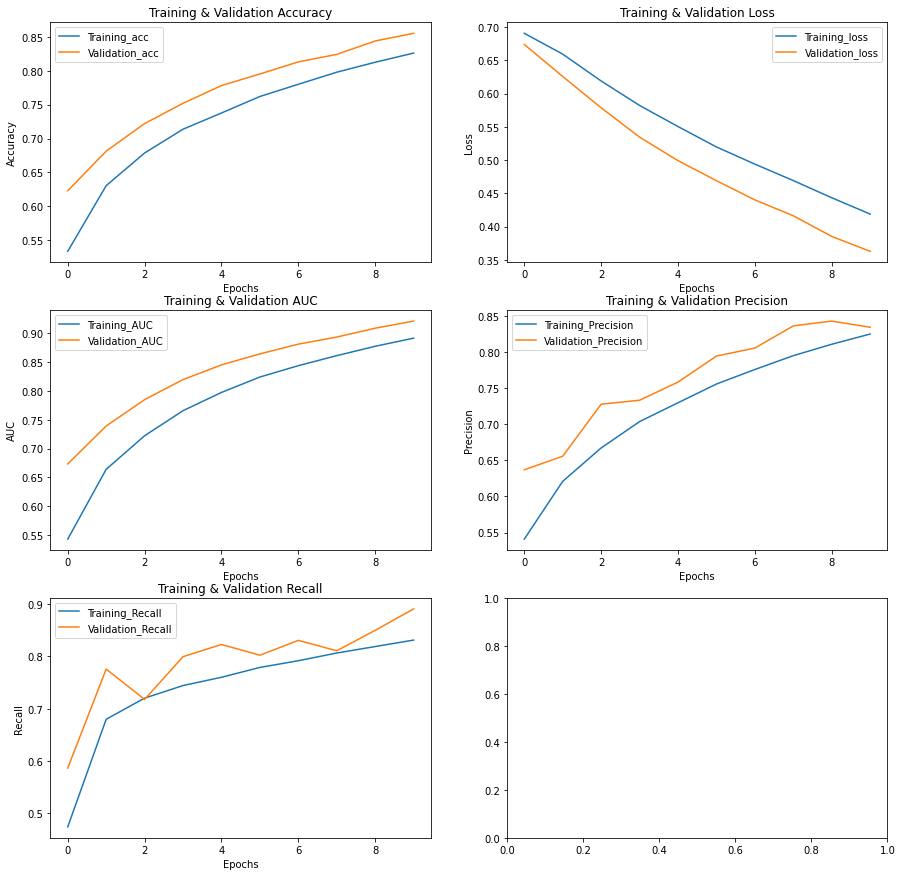

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations 
fig, axes = plt.subplots(3, 2, figsize = (15, 15))
#fig.suptitle('Metrics Evaluation for Training & Validation Data')

epochs = list(range(0, 10))
sns.lineplot(epochs, history.history['accuracy'], label = 'Training_acc', ax = axes[0][0])
sns.lineplot(epochs, history.history['val_accuracy'], label = 'Validation_acc', ax = axes[0][0])

sns.lineplot(epochs, history.history['loss'], label = 'Training_loss', ax = axes[0][1])
sns.lineplot(epochs, history.history['val_loss'], label = 'Validation_loss', ax = axes[0][1])

sns.lineplot(epochs, history.history['auc'], label = 'Training_AUC', ax = axes[1][0])
sns.lineplot(epochs, history.history['val_auc'], label = 'Validation_AUC', ax = axes[1][0])

sns.lineplot(epochs, history.history['precision'], label = 'Training_Precision', ax = axes[1][1])
sns.lineplot(epochs, history.history['val_precision'], label = 'Validation_Precision', ax = axes[1][1])

sns.lineplot(epochs, history.history['recall'], label = 'Training_Recall', ax = axes[2][0])
sns.lineplot(epochs, history.history['val_recall'], label = 'Validation_Recall', ax = axes[2][0])

axes[0][0].set(xlabel = 'Epochs', ylabel = 'Accuracy')
axes[0][0].set_title("Training & Validation Accuracy")

axes[0][1].set(xlabel = 'Epochs', ylabel = 'Loss')
axes[0][1].set_title("Training & Validation Loss")

axes[1][0].set(xlabel = 'Epochs', ylabel = 'AUC')
axes[1][0].set_title("Training & Validation AUC")

axes[1][1].set(xlabel = 'Epochs', ylabel = 'Precision')
axes[1][1].set_title("Training & Validation Precision")

axes[2][0].set(xlabel = 'Epochs', ylabel = 'Recall')
axes[2][0].set_title("Training & Validation Recall")

plt.show()